In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("player_activity.csv")

In [7]:
df.head()

,account_id,platform_id,occur_date,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success,money_vs_time_spent,rp_vs_time_spent
0,123,PC,2020-10-10,Nightclub Owner,2.421073,0,0,0,13847.602,497.001376,0,5720.025822,205.694462
1,6579,XBOX,2020-09-23,Heist,3.755906,0,0,0,0.000,331.334251,0,0.266247,88.483108
2,4223,XBOX,2020-09-07,Executive,1.075432,0,0,0,0.000,3512.143060,1,0.929859,3266.726894
3,1260,XBOX,2020-11-21,Heist,2.113035,0,0,0,0.000,497.001376,0,0.473253,235.680611
4,8638,XBOX,2020-09-03,Heist,3.183063,0,0,0,0.000,497.001376,0,0.314163,156.453512


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845618 entries, 0 to 845617
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   account_id           845618 non-null  int64  
 1   platform_id          845618 non-null  object 
 2   occur_date           845618 non-null  object 
 3   activity_type        845618 non-null  object 
 4   time_spent           845618 non-null  float64
 5   kills                845618 non-null  int64  
 6   deaths               845618 non-null  int64  
 7   suicides             845618 non-null  int64  
 8   money_earned         845618 non-null  float64
 9   rp_earned            845618 non-null  float64
 10  success              845618 non-null  int64  
 11  money_vs_time_spent  845618 non-null  float64
 12  rp_vs_time_spent     845618 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 83.9+ MB


In [9]:
df.isnull().sum()

account_id             0
platform_id            0
occur_date             0
activity_type          0
time_spent             0
kills                  0
deaths                 0
suicides               0
money_earned           0
rp_earned              0
success                0
money_vs_time_spent    0
rp_vs_time_spent       0
dtype: int64

In [11]:
df.describe()

,account_id,time_spent,kills,deaths,suicides,money_earned,rp_earned,success,money_vs_time_spent,rp_vs_time_spent
count,845618.000000,845618.000000,845618.000000,845618.000000,845618.000000,8.456180e+05,8.456180e+05,845618.000000,8.456180e+05,8.456180e+05
mean,4671.108781,2.252754,5.024785,0.568633,0.000234,9.458197e+03,3.504136e+03,0.406332,7.707240e+03,6.758213e+03
std,2779.526142,1.778670,13.869057,5.149348,0.016201,4.919884e+04,1.790734e+06,0.491148,3.003687e+05,5.198916e+06
min,0.000000,0.004475,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,5.000000e-02,5.289934e-02
25%,2249.000000,0.990404,0.000000,0.000000,0.000000,0.000000e+00,7.289354e+01,0.000000,5.168768e-01,6.780128e+01
50%,4652.000000,1.783380,0.000000,0.000000,0.000000,0.000000e+00,3.064842e+02,0.000000,1.392303e+00,1.293106e+02
75%,7084.000000,2.993917,1.000000,0.000000,0.000000,9.354205e+02,4.970014e+02,1.000000,3.684397e+02,2.854530e+02
max,9526.000000,20.000000,501.000000,593.000000,3.000000,6.191997e+06,1.417764e+09,1.000000,1.733864e+08,4.746192e+09


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.groupby('activity_type')['time_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
activity_type,,,,,,,,
Biker,96970.0,2.702272,1.878339,0.005404,1.361854,2.340011,3.577568,18.903827
Casino,21453.0,1.425201,1.139263,0.004475,0.575059,1.067628,2.002390,11.680625
Executive,126278.0,2.040761,1.319250,0.005404,1.118666,1.723934,2.599411,10.840788
Freeroam - Business Battles,28338.0,5.016076,2.900128,0.005404,2.539965,4.539513,7.101095,18.601193
Gunrunner,36540.0,3.201218,1.820294,0.005404,1.891464,2.912854,4.280112,10.921851
Heist,473976.0,2.002015,1.657299,0.005404,0.772857,1.529891,2.709666,20.000000
Nightclub Owner,8668.0,2.566882,1.020809,0.010808,1.853634,2.480519,3.183063,6.490422
Race,53395.0,2.329375,1.334208,0.200776,1.463223,2.021656,2.862028,20.000000


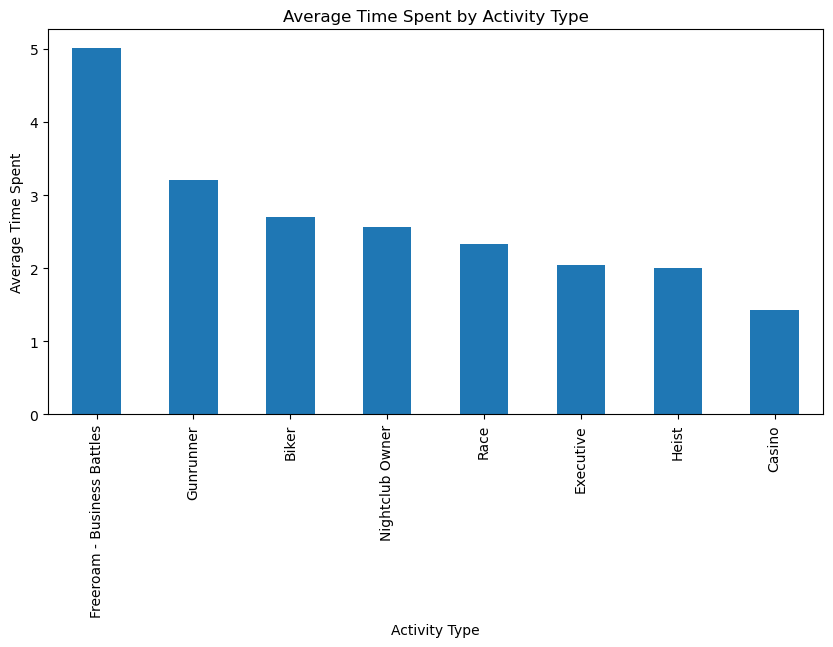

In [14]:
import matplotlib.pyplot as plt
grouped = df.groupby('activity_type')['time_spent'].mean().sort_values(ascending=False)

grouped.plot(kind='bar', figsize=(10,5), title='Average Time Spent by Activity Type')
plt.ylabel('Average Time Spent')
plt.xlabel('Activity Type')
plt.show()

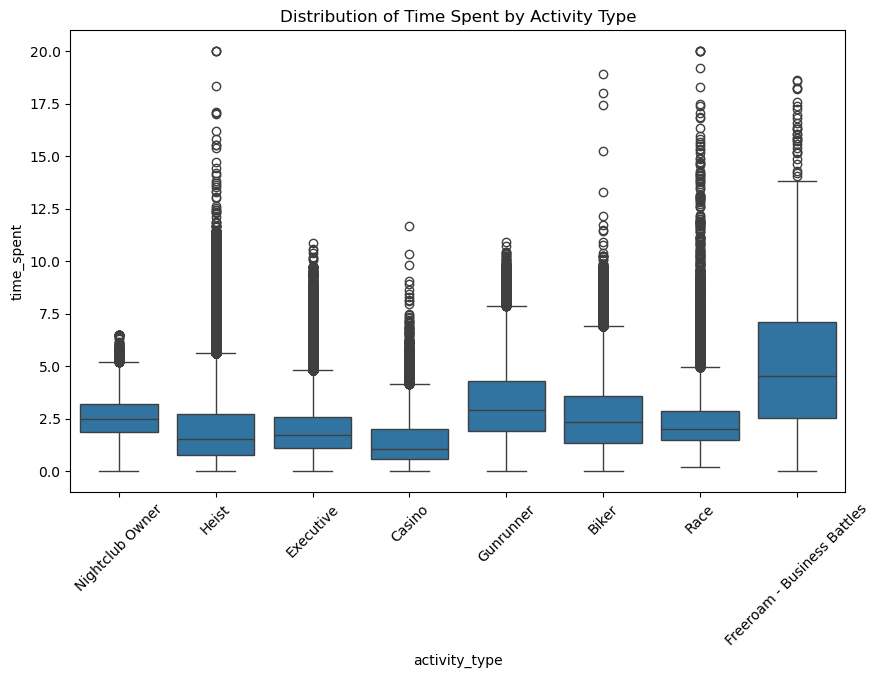

In [15]:
# graph showing the spread of activity instead of averages
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='activity_type', y='time_spent')
plt.xticks(rotation=45)
plt.title('Distribution of Time Spent by Activity Type')
plt.show()

In [24]:
# compare money earned between RP per activity
activity_summary = df.groupby('activity_type')[['money_earned', 'rp_earned']].mean().sort_values(by='money_earned', ascending=False)
activity_summary

,money_earned,rp_earned
activity_type,,
Nightclub Owner,63068.974205,428.857679
Gunrunner,27872.097889,418.318106
Executive,9414.413216,723.509143
Heist,9105.173992,3324.009237
Biker,7301.648303,186.154496
Freeroam - Business Battles,3326.435780,591.522486
Race,1959.233109,23097.740066
Casino,1002.520258,427.727729


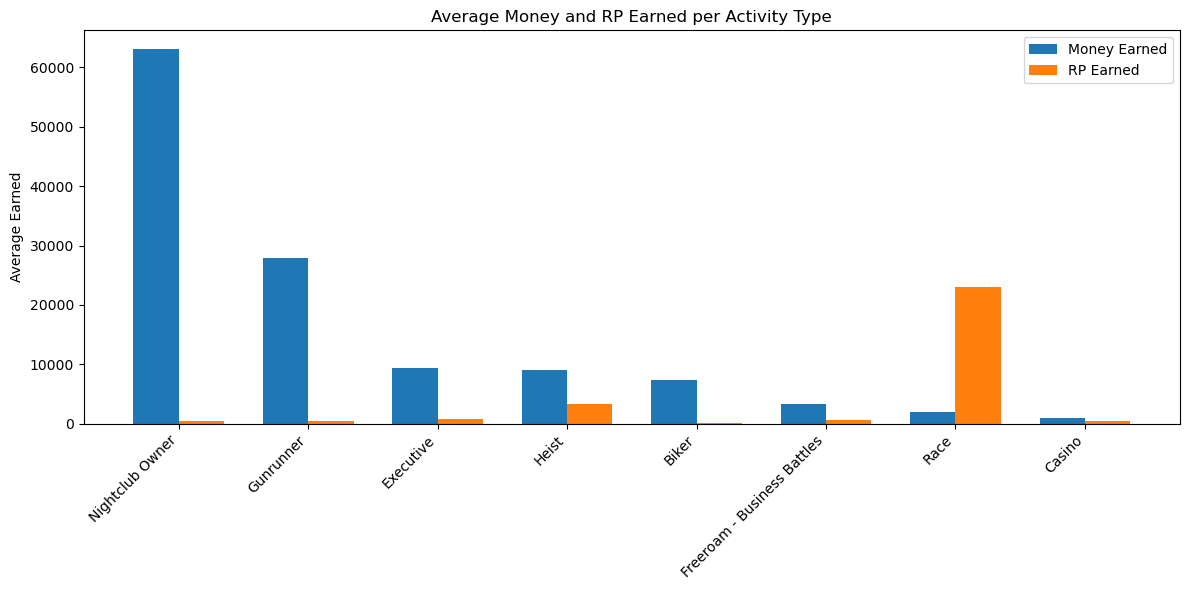

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Set positions and width for bars
x = np.arange(len(activity_summary))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

# Plot money earned
ax.bar(x - width/2, activity_summary['money_earned'], width, label='Money Earned')

# Plot RP earned
ax.bar(x + width/2, activity_summary['rp_earned'], width, label='RP Earned')

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(activity_summary.index, rotation=45, ha='right')
ax.set_ylabel('Average Earned')
ax.set_title('Average Money and RP Earned per Activity Type')
ax.legend()

plt.tight_layout()
plt.show()

In [28]:
# check if longer sessions means higher chances of success

platform_summary = df.groupby('platform_id')['time_spent'].mean().sort_values()
platform_summary

platform_id
PC      2.089202
XBOX    2.304057
PS4     2.305185
Name: time_spent, dtype: float64

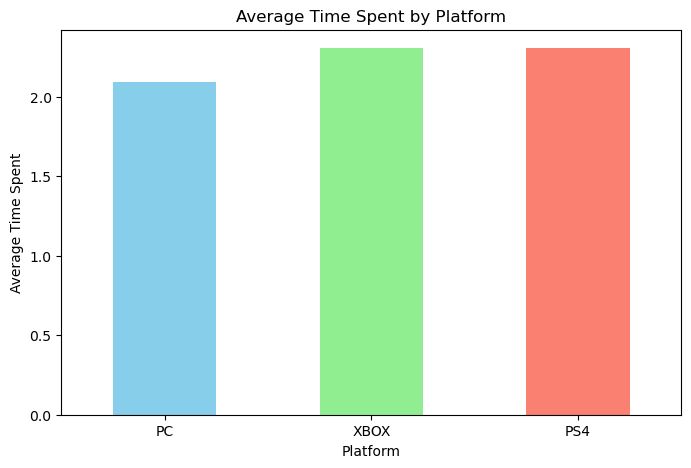

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
platform_summary.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Time Spent by Platform')
plt.ylabel('Average Time Spent')
plt.xlabel('Platform')
plt.xticks(rotation=0)
plt.show()

In [18]:
# does success tend to increase with more time spent
df['success'].corr(df['time_spent'])

np.float64(-0.03439227784809242)

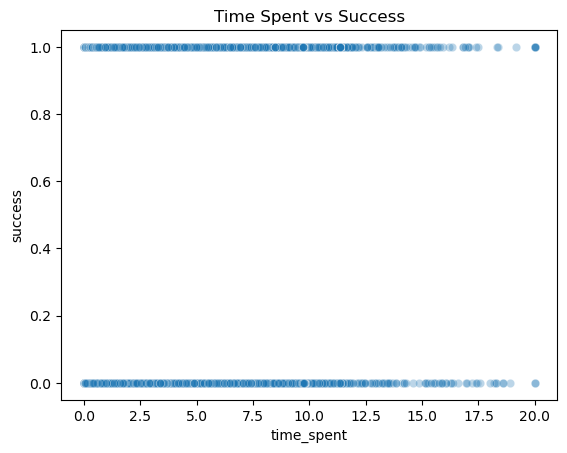

In [19]:
# show that in a plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='time_spent', y='success', data=df, alpha=0.3)
plt.title('Time Spent vs Success')
plt.show()

In [20]:
# does platform affect time spent 
df.groupby('platform_id')['time_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
platform_id,,,,,,,,
PC,202942.0,2.089202,1.657075,0.004475,0.919871,1.656549,2.756846,20.0
PS4,195095.0,2.305185,1.806035,0.005404,1.021390,1.826613,3.069575,20.0
XBOX,447581.0,2.304057,1.815044,0.005404,1.011630,1.827873,3.074979,20.0


In [26]:
import pandas as pd

platform_summary = df.groupby('platform_id')['time_spent'].mean().sort_values()
platform_summary

platform_id
PC      2.089202
XBOX    2.304057
PS4     2.305185
Name: time_spent, dtype: float64

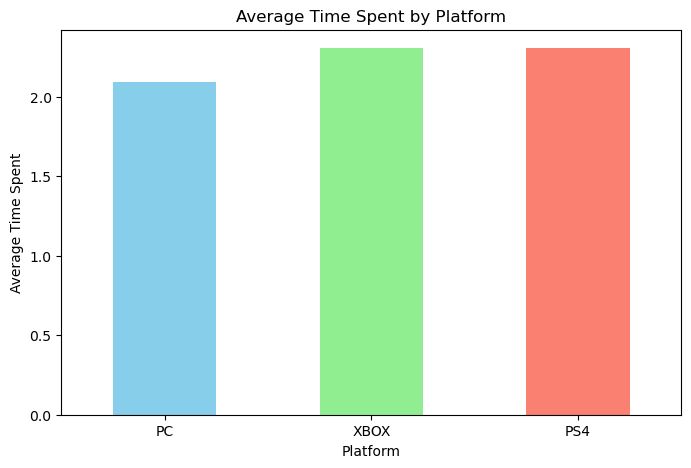

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
platform_summary.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Time Spent by Platform')
plt.ylabel('Average Time Spent')
plt.xlabel('Platform')
plt.xticks(rotation=0)
plt.show()

In [21]:
# do players kill more in certain activities
df.groupby('activity_type')['kills'].mean().sort_values(ascending=False)

activity_type
Casino                         19.100592
Heist                           8.095528
Race                            0.041165
Biker                           0.000000
Executive                       0.000000
Freeroam - Business Battles     0.000000
Gunrunner                       0.000000
Nightclub Owner                 0.000000
Name: kills, dtype: float64